# Read and Write Sequence from JSON file Tutorial

In [6]:
#
# IMPORTS
#
%matplotlib nbagg
import broadbean as bb
from broadbean.plotting import plotter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8, 3)
mpl.rcParams['figure.subplot.bottom'] = 0.15 
import yaml
import re
import json

## Building the Sequence

<IPython.core.display.Javascript object>


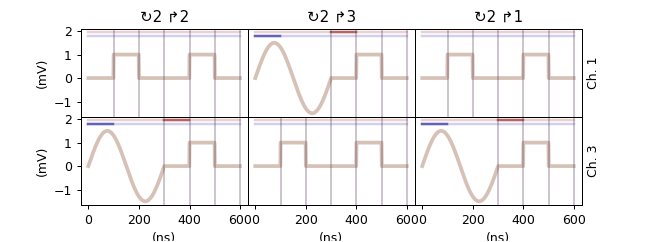

In [7]:
######################################################
# The pulsebuilding module comes with a (small) collection of functions appropriate for being segments.
ramp = bb.PulseAtoms.ramp  # args: start, stop
sine = bb.PulseAtoms.sine  # args: freq, ampl, off, phase
seq1 = bb.Sequence()

# We fill up the sequence by adding elements at different sequence positions. 
# A valid sequence is filled from 1 to N with NO HOLES, i.e. if position 4 is filled, so must be position 1, 2, and 3

#
# Make blueprints, make elements

# Create the blueprints
bp_square = bb.BluePrint()
bp_square.setSR(1e9)
bp_square.insertSegment(0, ramp, (0, 0), dur=100e-9)
bp_square.insertSegment(1, ramp, (1e-3, 1e-3), name='top', dur=100e-9)
bp_square.insertSegment(2, ramp, (0, 0), dur=100e-9)
bp_boxes = bp_square + bp_square
#
bp_sine = bb.BluePrint()
bp_sine.setSR(1e9)
bp_sine.insertSegment(0, sine, (3.333e6, 1.5e-3, 0, 0), dur=300e-9)
bp_sineandboxes = bp_sine + bp_square

bp_sineandboxes.setSegmentMarker('ramp', (-0.0, 100e-9), 1)  # segment name, (delay, duration), markerID
bp_sineandboxes.setSegmentMarker('sine', (-0.0, 100e-9), 2)  # segment name, (delay, duration), markerID
# make marker 2 go ON halfway through the sine
#bp_rtm.setSegmentMarker('mysine', (0.75, 0.1), 2)


# create elements
elem1 = bb.Element()
elem1.addBluePrint(1, bp_boxes)
elem1.addBluePrint(3, bp_sineandboxes)
#
elem2 = bb.Element()
elem2.addBluePrint(3, bp_boxes)
elem2.addBluePrint(1, bp_sineandboxes)

# Fill up the sequence
seq1.addElement(1, elem1)  # Call signature: seq. pos., element
seq1.addElement(2, elem2)
seq1.addElement(3, elem1)

# set its sample rate
seq1.setSR(elem1.SR)

seq1.setChannelAmplitude(1, 10e-3)  # Call signature: channel, amplitude (peak-to-peak)
seq1.setChannelOffset(1, 0)
seq1.setChannelAmplitude(3, 10e-3)
seq1.setChannelOffset(3, 0) 

# Here we repeat each element twice and then proceed to the next, wrapping over at the end
seq1.setSequencingTriggerWait(1, 0)
seq1.setSequencingNumberOfRepetitions(1, 2)
seq1.setSequencingEventJumpTarget(1, 0)
seq1.setSequencingGoto(1, 2)
#
seq1.setSequencingTriggerWait(2, 0)
seq1.setSequencingNumberOfRepetitions(2, 2)
seq1.setSequencingEventJumpTarget(2, 0)
seq1.setSequencingGoto(2, 3)
#
seq1.setSequencingTriggerWait(3, 0)
seq1.setSequencingNumberOfRepetitions(3, 2)
seq1.setSequencingEventJumpTarget(3, 0)
seq1.setSequencingGoto(3, 1)
plotter(seq1)

## Writing the Sequence to a file

In [8]:

seq1.write_to_json('tests/testdata.json')

## Reading the Sequence back from the file  

In [9]:
seq = bb.Sequence.init_from_json('tests/testdata.json')

<IPython.core.display.Javascript object>


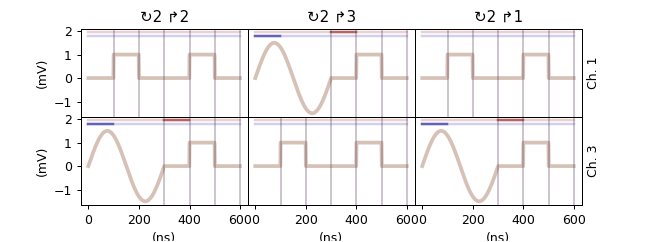

In [10]:
plotter(seq)

### Test if the Sequences are identical

In [11]:
print(seq.description == seq1.description)

True


In [12]:
assert seq == seq1